<span style="float: left;padding: 1.3em">![logo](https://github.com/gw-odw/odw-2024/blob/main/Tutorials/logo.png?raw=1)</span>

#  Gravitational Wave Open Data Workshop #7


#### Tutorial 1.1: Discovering open data from GW observatories

This notebook describes how to discover what data are available from the [Gravitational-Wave Open Science Center (GWOSC)](https://www.gw-openscience.org).
    
[Click this link to view this tutorial in Google Colaboratory](https://colab.research.google.com/github/gw-odw/odw-2024/blob/main/Tutorials/Day_1/Tuto_1.1_Discovering_Open_Data.ipynb)

## Software installation  (execute only if running on a cloud platform or haven't done the installation yet!)

First, we need to install the software, which we do following the instruction in [Software Setup Instructions](../../setup.md):

In [1]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwosc==0.7.1'

In [2]:
#check the version of the package gwosc you are using
import gwosc
print(gwosc.__version__)

0.7.1


The version you get should be 0.7.1. If it's not, check that you have followed all the steps in [Software Setup Instructions](../../setup.md).

## Querying for event information

The module `gwosc.datasets` provides tools for searching for datasets, including events, catalogs and full run strain data releases.


For example, we can search for events in the [GWTC-1 catalog](https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/), the catalog of all events from the O1 and O2 observing runs. A list of available catalogs can be seen in the [Event Portal](https://gw-openscience.org/eventapi)

In [3]:
from gwosc.datasets import find_datasets
from gwosc import datasets

#-- List all available catalogs
print("List of available catalogs")
print(find_datasets(type="catalog"))

List of available catalogs
['GWTC', 'GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'GWTC-2.1-auxiliary', 'GWTC-2.1-confident', 'GWTC-2.1-marginal', 'GWTC-3-confident', 'GWTC-3-marginal', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal', 'O4_Discovery_Papers']


In [4]:
#-- Print all the GW events from the GWTC-1 catalog
gwtc1 = datasets.find_datasets(type='events', catalog='GWTC-1-confident')
print('GWTC-1 events:', gwtc1)
print("")

GWTC-1 events: ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']



Note that the event name is of the type _GWyymmdd-vx_ where _x_ is the last available version for the data set provided by GWOSC.

In [5]:
#-- Print all the large strain data sets from LIGO/Virgo/KAGRA observing runs
runs = find_datasets(type='run')
print('Large data sets:', runs)

Large data sets: ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3GK_16KHZ_R1', 'O3GK_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'O3b_16KHZ_R1', 'O3b_4KHZ_R1', 'S5', 'S6']


_Attention: Note that the most recent observation runs, e.g. O2, are labeled with names containing the name of the run (e.g. O2), the sampling rate (4 or 16 kHz) and the release version (e.g. R1). This means that for O2 you have two labels 'O2_4KHZ_R1' and 'O2_16KHZ_R1', depending which is the desired sampling rate_

`datasets.find_datasets` also accepts a `segment` and `detector` keyword to narrow results based on GPS time and detector:

In [6]:
#-- Detector and segments keywords limit search result
print(datasets.find_datasets(type='events', catalog='GWTC-1-confident', detector="L1", segment=(1164556817, 1187733618)))

['GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


Using `gwosc.datasets.event_gps`, we can query for the GPS time of a specific event (it works also without the version number):

In [7]:
from gwosc.datasets import event_gps
gps = event_gps('GW190425')
print(gps)

1240215503.0


<div class="alert alert-info">All of these times are returned in the GPS time system, which counts the number of seconds that have elapsed since the start of the GPS epoch at midnight (00:00) on January 6th 1980. GWOSC provides a <a href="https://www.gw-openscience.org/gps/">GPS time converter</a> you can use to translate into datetime, or you can use <a href="https://gwpy.github.io/docs/stable/time/"><code>gwpy.time</code></a>.</div>

In [8]:
# You can do also the vice-versa
from gwosc.datasets import event_at_gps
print(datasets.event_at_gps(1240215503))

GW190425


Note that the method `event_at_gps` looks for events found within 1 seconds of the given GPS time. If no events is found it will give an error.

We can query for the GPS time interval for an observing run:

In [9]:
from gwosc.datasets import run_segment
print(run_segment('O1'))

(1126051217, 1137254417)


In [10]:
# and vice-versa also in this case
from gwosc.datasets import run_at_gps
print(run_at_gps(1240215503))

O3a_4KHZ_R1


Now we can use what we have learned with `run_segment` and `find_datasets` to see only the confident events in O1:

In [11]:
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
print(O1_events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2']


## Querying for data files

The `gwosc.locate` module provides a function to find the URLs of data files associated with a given dataset.

For event datasets, one can get the list of URLs using only the event name:

In [12]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW150914')
print(urls)

['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


By default, this function returns all of the files associated with a given event, which isn't particularly helpful. However, we can filter on any of these by using keyword arguments, for example to get the URL for the 32-second file for the LIGO-Livingston detector:

In [13]:
urls = get_event_urls('GW150914', duration=32, detector='L1')
print(urls)

['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


##  Query filtered by merger parameters
The `query_events` module of `gwosc.datasets` allows to get a list of events filtered by some parameters, similar to what is done by the `Query` function of the [event portal](https://www.gw-openscience.org/eventapi/html/query/). A list of available parameters can be found [here](https://gwosc.readthedocs.io/en/stable/reference/gwosc.datasets.query_events.html) or using `query_events?`.

Let's see how to use this module to find which events have been detected with a network signal to noise ratio (SNR) between 25 and 30:

In [14]:
from gwosc.datasets import query_events
selection = query_events(select=["25 <= network-matched-filter-snr <= 30"])
#this is equivalent to
#query_events(select=["network-matched-filter-snr <= 30", "network-matched-filter-snr>= 25"])
print(selection)

['GW200129_065458-v1', 'GW190814-v1', 'GW190814_211039-v3', 'GW190521_074359-v2', 'GW150914-v3']


Note that this module will give the list of **all available versions** for all the events that have the required parameters. For example, in this query the event GW190814 is listed twice because 2 versions of that event satisfy the request of SNR between 25 and 30.

# Exercises

Now that you've seen examples of how to query for dataset information using the `gwosc` package, please try and complete the following exercices using that interface:

- How many months did O2 last? (Hint: check the output of _find_datasets(type='run')_ to find the correct label to use)
- How many GWTC-3-confident events were detected during O3b?
- How many events have been detected with a network signal to noise ratio (SNR) >= 30?

Q. How many months did O2 last? Round to the nearest integer number of months.

In [28]:
name = 'O2_16KHZ_R1'
start, stop =run_segment(name)
print(start, stop)

time = stop- start
months= time/(3600*24*30)
print('number of months:',)

1164556817 1187733618
number of months:


Q.
How many GWTC-3-confident events were detected during O3b?

In [20]:
from gwosc.datasets import run_segment
O2 = run_segment('O2_4KHZ_R1')
print('O2 start and stop gps: ', O2)
time_seconds = O2[1] - O2[0]
month_seconds = 30 * 24 * 3600
print('months in O2:', time_seconds / month_seconds)

O2 start and stop gps:  (1164556817, 1187733618)
months in O2: 8.941667052469136


In [19]:
from gwosc.datasets import query_events
selection = query_events(select=["network-matched-filter-snr >= 30"])
print(selection)

['GW170817-v3']


Using to plot

Q. Plot the data for the LIGO-Hanford detector around GW190412. Looking at your new LIGO-Handford plot, can your eye identify a signal peak?

Fetched 1 URLs from gwosc.org for [1239082257 .. 1239082267))
Reading data... [Done]


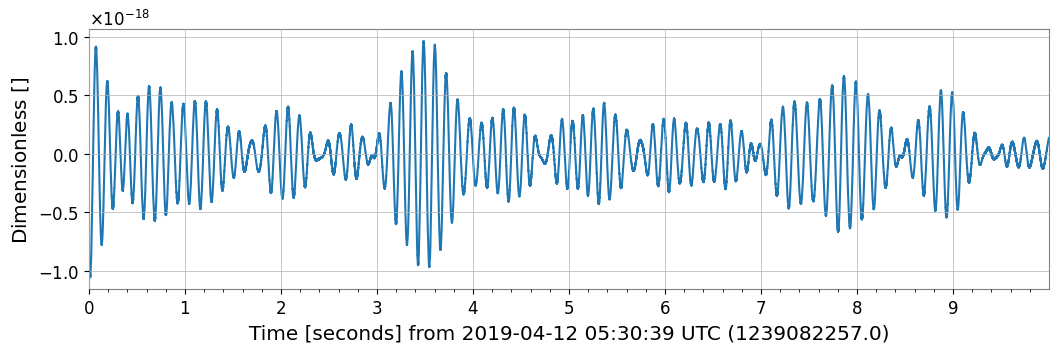

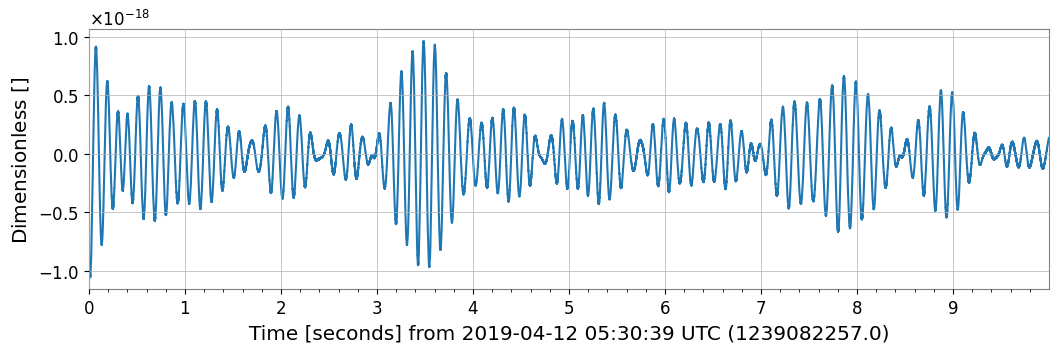

In [35]:
!pip install gwpy
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps

gps = event_gps('GW190412')
segment = (int(gps)-5, int(gps)+5)
hdata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
hdata.plot()

Fetched 1 URLs from gwosc.org for [1126259457 .. 1126259467))
Reading data... [Done]


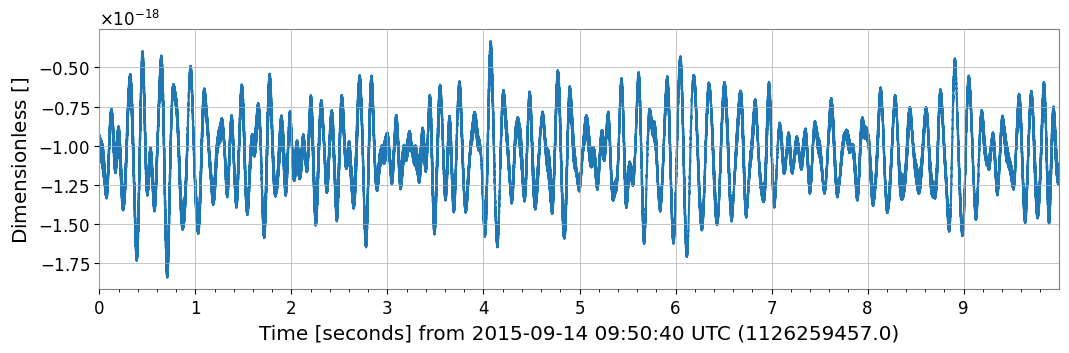

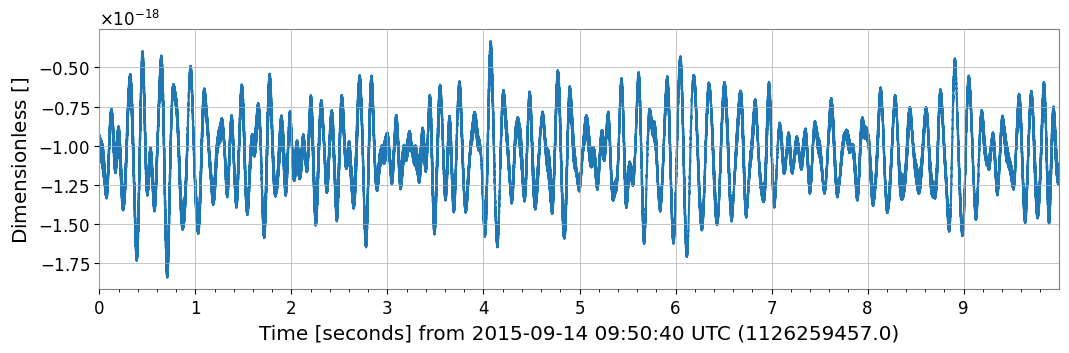

In [36]:
gps1 = event_gps('GW150914')
segment = (int(gps1)-5, int(gps1)+5)
hdata1 = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
hdata1.plot()

(10, 2000)

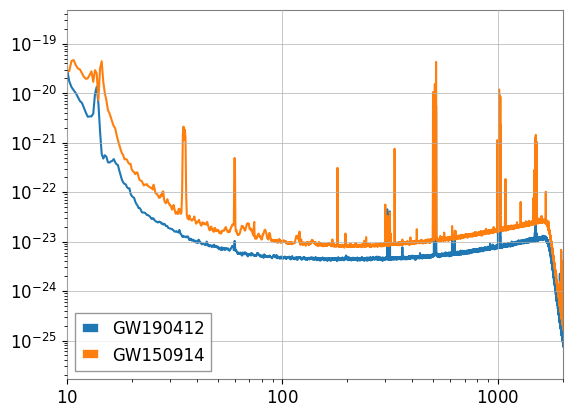

In [37]:
# alternative of the above code

from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import pylab as plt

gps = event_gps('GW190412')
ldata = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
lasd = ldata.asd(fftlength=4, method="median")

gps2 = event_gps('GW150914')
ldata2 = TimeSeries.fetch_open_data('L1', int(gps2)-512, int(gps2)+512, cache=True)
lasd2 = ldata2.asd(fftlength=4, method="median")

plt.loglog(lasd, label = 'GW190412')
plt.loglog(lasd2,label = 'GW150914')
plt.legend()
plt.xlim(10,2000)